In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

train_file = "data/train.csv"
train_data = pd.read_csv(train_file)

train_data[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
# 取出 Label

col_label = ['Survived']

train_label_df = train_data[col_label].copy()
train_label = train_label_df.values[:, 0]

train_label[:5]

array([0, 1, 1, 1, 0], dtype=int64)

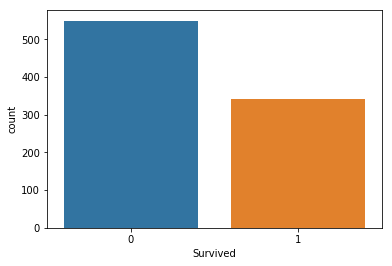

In [4]:
sns.countplot(train_data['Survived'])

,Sex,Survived
0,female,0.742
1,male,0.189


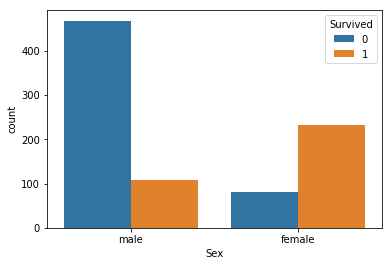

In [5]:
# Sex: 性別
sns.countplot(train_data['Sex'], hue = train_data['Survived'])
display(train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().round(3))

,Pclass,Survived
0,1,0.630
1,2,0.473
2,3,0.242


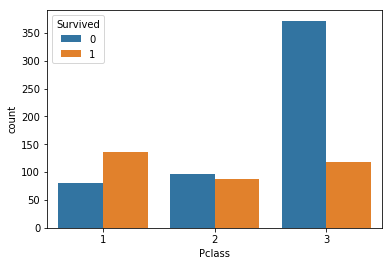

In [6]:
# Pclass: 艙等
sns.countplot(train_data['Pclass'], hue = train_data['Survived'])
display(train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().round(3))

,Embarked,Survived
0,C,0.554
1,Q,0.390
2,S,0.337


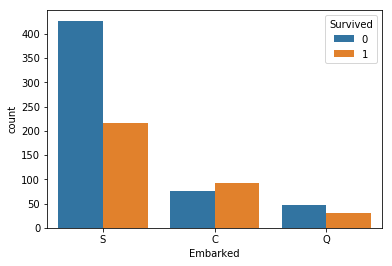

In [7]:
# Embarked: 登船港口, C = Cherbourg, Q = Queenstown, S = Southampton

col_target = 'Embarked'
sns.countplot(train_data[col_target], hue = train_data['Survived'])
display(train_data[[col_target, 'Survived']].groupby([col_target], as_index=False).mean().round(3))

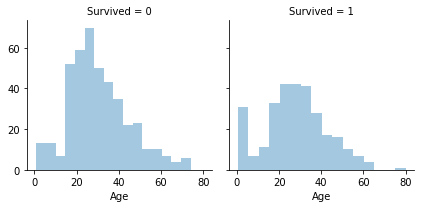

In [8]:
# Age: 年齡

g = sns.FacetGrid(train_data, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

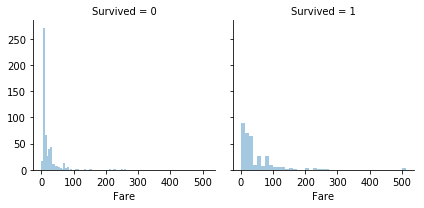

In [9]:
# Fare: 旅客費用

g = sns.FacetGrid(train_data, col='Survived')
g.map(sns.distplot, 'Fare', kde=False)

Fare        
Survived      0       1
Pclass                 
1         44.75  77.958
2         13.00  21.000
3          8.05   8.517

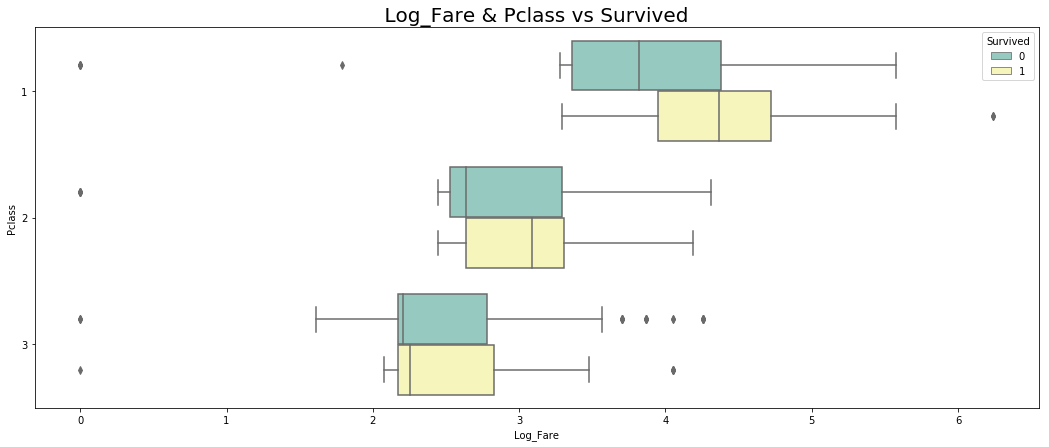

In [10]:
fig, ax = plt.subplots(figsize = (18,7))
train_data['Log_Fare'] = (train_data['Fare']+1).map(lambda x: np.log(x) if x > 0 else 0)

sns.boxplot(y='Pclass', x='Log_Fare', hue='Survived', 
            data=train_data, orient='h', ax=ax, palette='Set3')

ax.set_title(' Log_Fare & Pclass vs Survived ', fontsize=20)

pd.pivot_table(train_data, values=['Fare'], index=['Pclass'], columns=['Survived'], 
               aggfunc='median').round(3)

In [11]:
# Ticket

train_data['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

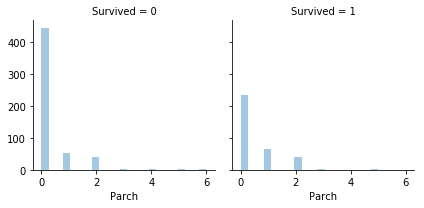

In [12]:
# Parch: 雙親或子女也在船上的數量
g = sns.FacetGrid(train_data, col='Survived')
g.map(sns.distplot, 'Parch', kde=False)

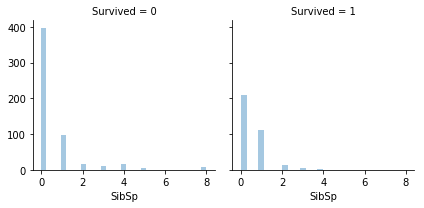

In [13]:
# SibSP: 手足或配偶也在船上的數量
g = sns.FacetGrid(train_data, col='Survived')
g.map(sns.distplot, 'SibSp', kde=False)

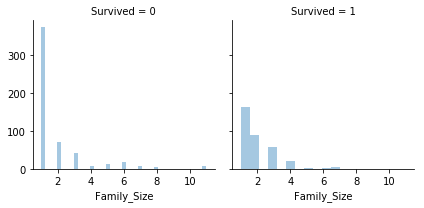

In [14]:
# Family_Size: 家庭大小 = Parch + SibSp
train_data['Family_Size'] = train_data['Parch'] + train_data['SibSp'] + 1

g = sns.FacetGrid(train_data, col='Survived')
g.map(sns.distplot, 'Family_Size', kde=False)

In [15]:
# Name

train_data['Title1'] = train_data['Name'].str.split(', ', expand=True)[1]
# train_data['Title1'].head()

train_data['Title1'] = train_data['Title1'].str.split('.', expand=True)[0]
# train_data['Title1'].head()

train_data['Title1'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [16]:
pd.crosstab(train_data['Title1'], train_data['Sex']).T.style.background_gradient(cmap='summer_r')

Title1,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,
female,0,0,0,1,0,1,0,0,182,2,1,0,125,1,0,0,1
male,1,2,1,6,1,0,2,40,0,0,0,517,0,0,6,1,0


In [17]:
train_data['Title2'] = train_data['Title1'].replace(
  ['Mlle','Mme','Ms',  'Dr','Major','Lady','the Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
  ['Miss','Mrs','Miss','Dr','Mr',   'Mrs', 'Mrs',         'Mr',      'Mr', 'Mr', 'Mr',  'Mr', 'Mr', 'Mrs']
)

pd.crosstab(train_data['Title2'], train_data['Sex']).T.style.background_gradient(cmap='summer_r')

Title2,Dr,Master,Miss,Mr,Mrs
Sex,,,,,
female,1,0,185,0,128
male,6,40,0,531,0


In [18]:
train_data['Cabin'].head(10)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [19]:
# Carbin

train_data['Cabin'] = train_data['Cabin'].apply(lambda x: str(x)[0] if not pd.isnull(x) else 'NoCabin')
train_data['Cabin'].unique()

array(['NoCabin', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

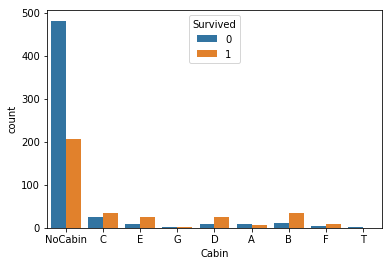

In [20]:
sns.countplot(train_data['Cabin'], hue=train_data['Survived'])

In [21]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Log_Fare,Family_Size,Title1,Title2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NoCabin,S,2.110213,2,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,4.280593,2,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NoCabin,S,2.188856,1,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,3.990834,2,Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NoCabin,S,2.202765,1,Mr,Mr


In [22]:
train_data['Pclass'] = train_data['Pclass'].astype('category').cat.codes
train_data['Cabin'] = train_data['Cabin'].astype('category').cat.codes
train_data['Title2'] = train_data['Title2'].astype('category').cat.codes

train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Log_Fare,Family_Size,Title1,Title2
0,1,0,2,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,7,S,2.110213,2,Mr,3
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2,C,4.280593,2,Mrs,4
2,3,1,2,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,7,S,2.188856,1,Miss,2
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2,S,3.990834,2,Mrs,4
4,5,0,2,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,7,S,2.202765,1,Mr,3


In [23]:
col_features = ['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Cabin', 'Family_Size', 'Title2']

train_feature_df = train_data[col_features].copy()
train_feature_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin,Family_Size,Title2
0,2,male,22.0,1,0,7.2500,S,7,2,3
1,0,female,38.0,1,0,71.2833,C,2,2,4
2,2,female,26.0,0,0,7.9250,S,7,1,2
3,0,female,35.0,1,0,53.1000,S,2,2,4
4,2,male,35.0,0,0,8.0500,S,7,1,3


In [24]:
from sklearn import preprocessing

def PreprocessData(df_raw):
    
    df_raw.loc[df_raw.Sex == 'male',   "Sex"] = 1
    df_raw.loc[df_raw.Sex == 'female', "Sex"] = 0
    
    fare_mean = df_raw['Fare'].mean()
    df_raw['Fare'] = df_raw['Fare'].fillna(fare_mean)

    age_mean  = df_raw['Age'].mean()
    df_raw.loc[df_raw.Age.isnull(), "Age"] = age_mean

    df_OneHot = pd.get_dummies(data = df_raw, columns=["Embarked"])

    ndarray = df_OneHot.values

    minmax_scale = preprocessing.MinMaxScaler(feature_range = (0,1))
    array_features = minmax_scale.fit_transform(ndarray)
    
    return array_features

train_feature = PreprocessData(train_feature_df)
train_feature[:5]

array([[1.        , 1.        , 0.27117366, 0.125     , 0.        ,
        0.01415106, 0.875     , 0.1       , 0.75      , 0.        ,
        0.        , 1.        ],
       [0.        , 0.        , 0.4722292 , 0.125     , 0.        ,
        0.13913574, 0.25      , 0.1       , 1.        , 1.        ,
        0.        , 0.        ],
       [1.        , 0.        , 0.32143755, 0.        , 0.        ,
        0.01546857, 0.875     , 0.        , 0.5       , 0.        ,
        0.        , 1.        ],
       [0.        , 0.        , 0.43453129, 0.125     , 0.        ,
        0.1036443 , 0.25      , 0.1       , 1.        , 0.        ,
        0.        , 1.        ],
       [1.        , 1.        , 0.43453129, 0.        , 0.        ,
        0.01571255, 0.875     , 0.        , 0.75      , 0.        ,
        0.        , 1.        ]])

In [25]:
# Create Model

from keras.models import Sequential
from keras.layers import Dense, Dropout

# Cretae Keras Sequential Model

def Model_MLP():
    model = Sequential()
    
    # Input & Hidden Layer 1
    model.add(Dense(units = 24, input_dim = 12, kernel_initializer = 'uniform', activation = 'relu'))
                    
    # Hidden Layer 2
    model.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu'))

    # Hidden Layer 2
    model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    
    # Output Layer
    model.add(Dense(units = 1, kernel_initializer = 'uniform',activation = 'sigmoid'))
    
    return model

model = Model_MLP()
print(model.summary())

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
Total params: 697
Trainable params: 697
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
# Training

# Define Training method
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Begin Training
train_history = model.fit(x = train_feature,
                          y = train_label,
                          validation_split = 0.1,
                          epochs = 30,
                          batch_size = 50,
                          verbose = 2)

Train on 801 samples, validate on 90 samples
Epoch 1/30
 - 2s - loss: 0.6923 - acc: 0.6080 - val_loss: 0.6913 - val_acc: 0.6222
Epoch 2/30
 - 0s - loss: 0.6905 - acc: 0.6155 - val_loss: 0.6891 - val_acc: 0.6222
Epoch 3/30
 - 0s - loss: 0.6881 - acc: 0.6155 - val_loss: 0.6862 - val_acc: 0.6222
Epoch 4/30
 - 0s - loss: 0.6845 - acc: 0.6155 - val_loss: 0.6805 - val_acc: 0.6222
Epoch 5/30
 - 0s - loss: 0.6776 - acc: 0.6155 - val_loss: 0.6693 - val_acc: 0.6222
Epoch 6/30
 - 0s - loss: 0.6660 - acc: 0.6155 - val_loss: 0.6531 - val_acc: 0.6222
Epoch 7/30
 - 0s - loss: 0.6509 - acc: 0.6155 - val_loss: 0.6363 - val_acc: 0.6222
Epoch 8/30
 - 0s - loss: 0.6356 - acc: 0.6155 - val_loss: 0.6164 - val_acc: 0.6222
Epoch 9/30
 - 0s - loss: 0.6152 - acc: 0.6155 - val_loss: 0.5910 - val_acc: 0.6222
Epoch 10/30
 - 0s - loss: 0.5936 - acc: 0.6155 - val_loss: 0.5680 - val_acc: 0.6222
Epoch 11/30
 - 0s - loss: 0.5751 - acc: 0.6479 - val_loss: 0.5490 - val_acc: 0.7667
Epoch 12/30
 - 0s - loss: 0.5589 - acc: 

In [27]:
import matplotlib.pyplot as plt

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('Train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

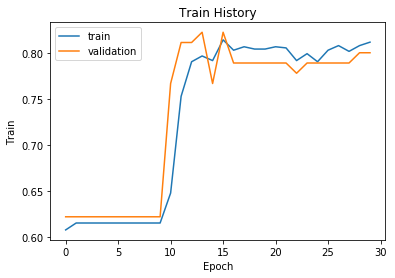

In [28]:
show_train_history(train_history, 'acc', 'val_acc')

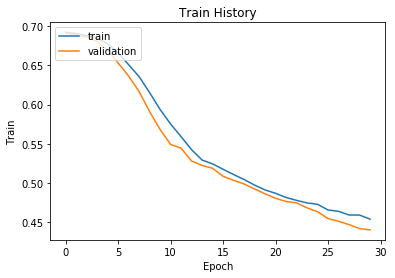

In [29]:
show_train_history(train_history, 'loss', 'val_loss')

In [30]:
# Accuracy Evaluation
scores = model.evaluate(train_feature, train_label)
scores[1]

891/891 [==============================] - 0s 65us/step


0.8047138055834572

In [31]:
# Test

test_file = "data/test.csv"
test_data = pd.read_csv(test_file)

# Family_Size
test_data['Family_Size'] = test_data['Parch'] + test_data['SibSp'] + 1

# Title2
test_data['Title1'] = test_data['Name'].str.split(', ', expand=True)[1]
test_data['Title1'] = test_data['Title1'].str.split('.', expand=True)[0]
test_data['Title2'] = test_data['Title1'].replace(
  ['Mlle','Mme','Ms',  'Dr','Major','Lady','the Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
  ['Miss','Mrs','Miss','Dr','Mr',   'Mrs', 'Mrs',         'Mr',      'Mr', 'Mr', 'Mr',  'Mr', 'Mr', 'Mrs']
)

# Cabin
train_data['Cabin'] = train_data['Cabin'].apply(lambda x: str(x)[0] if not pd.isnull(x) else 'NoCabin')

# Convert data to integer
test_data['Pclass'] = test_data['Pclass'].astype('category').cat.codes
test_data['Cabin']  = test_data['Cabin'].astype('category').cat.codes
test_data['Title2'] = test_data['Title2'].astype('category').cat.codes


test_feature_df = test_data[col_features].copy()
test_feature = PreprocessData(test_feature_df)

prediction = model.predict_classes(test_feature)

results = prediction.reshape(-1)
results[:5]

array([0, 1, 0, 0, 1])

In [32]:
results = pd.DataFrame({
    'PassengerId' : test_data['PassengerId'],
    'Survived'    : results
})

results.to_csv("data/submission2.csv", index = False)